In [1]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
from sklearn import metrics

%matplotlib inline

/Users/jamesmcglone/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Exercise 5.1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes. So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [149]:
df = pd.read_csv("house-votes-84.data", names = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'antisatellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,antisatellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
antisatellite-test-ban                    435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [151]:
df = df.replace(to_replace='y', value = 1).replace(to_replace='n', value = 0).replace(to_replace='?', value = np.nan)
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,antisatellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [152]:
df = df.fillna(df.mean())
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,antisatellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


Exercise 5.2

In [153]:
# 5.2 Cross validation: split data into train and test sets
df_y = df['party']
df_x = df.drop('party', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.30, random_state = 4444)

Exercise 5.3

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

Which k value gives the highest accuracy?

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [155]:
accuracy = []
for k in range(1, 21): 
    kn = KNeighborsClassifier(n_neighbors = k)
    kn_fit = kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    accuracy.append(acc)
    
neighbors = pd.DataFrame(accuracy, range(1,21))
kn_sort = neighbors.sort_values(0, ascending=False)
kn_sort

,0
6,0.931298
9,0.931298
10,0.931298
11,0.923664
14,0.923664
17,0.923664
16,0.923664
8,0.923664
15,0.923664
12,0.923664


Exercise 5.4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, lr_y_pred)
print acc

0.93893129771


Exercise 5.5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

dem:  267 / rep:  168


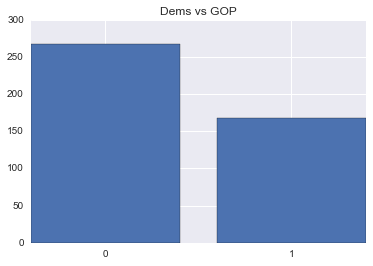

In [158]:
dem = (df.party.replace(to_replace='democrat', value=0)==0).sum()
rep = (df.party.replace(to_replace="republican", value=1)==1).sum()
print "dem: ", dem, "/ rep: ",rep

number = [dem, rep]
party = [0, 1]
plt.bar(party, number, align='center')
plt.xticks([0, 1])
plt.title('Dems vs GOP')
plt.show();

In [137]:
def predict_dem(X):
    return ['democrat' for d in range(len(X))]
def predict_rep(X):
    return ['republican' for d in range(len(X))]

dem_y_pred = predict_dem(X_test)
dem_score = accuracy_score(y_test, dem_y_pred)  
rep_y_pred = predict_rep(X_test)
rep_score = accuracy_score(y_test, rep_y_pred) 

print dem_score
print rep_score   

0.587786259542
0.412213740458


Exercise 5.6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

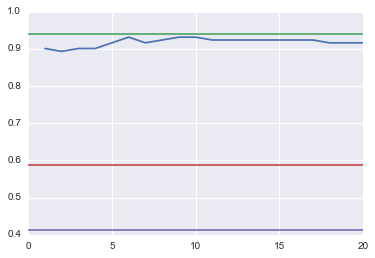

In [159]:
k = [k for k in range(1, 21)]

#plt.figure(figsize=(8,6))
plt.plot(k, accuracy);
plt.plot([0,20],[acc, acc]);
plt.plot([0,20],[dem_score, dem_score]);
plt.plot([0,20],[rep_score, rep_score]);

Exercise 5.7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:
    
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:
    
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [ ]:
from sklearn.learning_curve import learning_curve

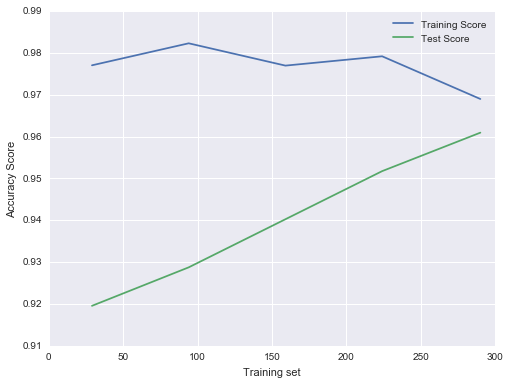

In [166]:
m, train_error, test_error = learning_curve(LogisticRegression(), df_x, df_y)

train_cv_err = np.mean(train_error, axis=1)
test_cv_err = np.mean(test_error, axis=1)

plt.figure(figsize=(8,6))
plt.plot(m, train_cv_err, label = 'Training Score')
plt.plot(m, test_cv_err, label = 'Test Score')
plt.xlabel("Training set")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')

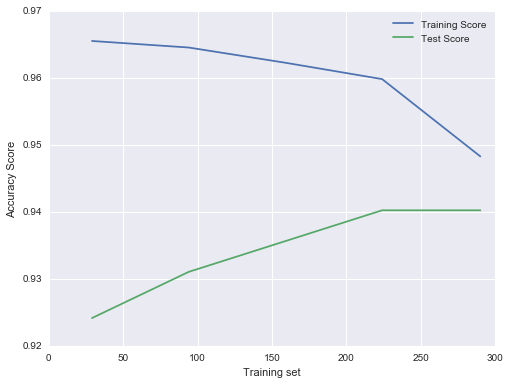

In [189]:
m, train_error, test_error = learning_curve(KNeighborsClassifier(n_neighbors=4), df_x, df_y)

train_cv_err = np.mean(train_error, axis=1)
test_cv_err = np.mean(test_error, axis=1)

plt.figure(figsize=(8,6))
plt.plot(m, train_cv_err, label = 'Training Score')
plt.plot(m, test_cv_err, label = 'Test Score')
plt.xlabel("Training set")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')

Exercise 5.8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

SVM (Support Vector Machine) Classifier

Decision Tree

Random Forest

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [175]:
#GaussianNB
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
acc = accuracy_score(y_test, pred)
print acc

0.93893129771


In [177]:
#SVC
svc = SVC()
fit = svc.fit(X_train, y_train)
pred = svc.predict(X_test)
acc = accuracy_score(y_test, pred)
print acc

0.954198473282


In [178]:
#Decision Tree
dt = DecisionTreeClassifier()
fit = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print acc

0.93893129771


In [179]:
ens = RandomForestClassifier()
fit = ens.fit(X_train, y_train)
y_pred = ens.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print acc

0.946564885496


Exercise 5.9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```from sklearn.cross_validation import cross_val_score```

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [180]:
from sklearn.cross_validation import cross_val_score

In [183]:
score = np.mean(cross_val_score(LogisticRegression(), df_x, df_y, cv=5))
print score

0.958483997959


In [188]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), df_x, df_y, cv=5))
print score

0.942522660446


In [190]:
score = np.mean(cross_val_score(GaussianNB(), df_x, df_y, cv=5))
print score

0.940144224928


In [192]:
score = np.mean(cross_val_score(SVC(), df_x, df_y, cv=5))
print score

0.953965274234


In [191]:
score = np.mean(cross_val_score(DecisionTreeClassifier(), df_x, df_y, cv=5))
print score

0.937818036014


In [193]:
score = np.mean(cross_val_score(RandomForestClassifier(), df_x, df_y, cv=5))
print score

0.951481130471


Exercise 5.10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [264]:
df10 = pd.read_csv("house-votes-84.data", names = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'antisatellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [265]:
df10[df10=='y'] = 1.0
df10[df10=='n'] = 0.0
df10 = df10.replace(to_replace='?', value = np.nan)
#df10 = df.fillna(df.mode())

In [266]:
df10 = df10.fillna(df.mode().iloc[0]) 
df10.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,antisatellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [267]:
df10 = df10.drop('party', axis=1)
y = df10['adoption-of-the-budget-resolution']
X = df10.drop('adoption-of-the-budget-resolution', axis=1)

In [268]:
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=5))
print score

0.859525892445


Exercise 5.11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [318]:
movies = pd.read_csv("2013_movies.csv", parse_dates=['ReleaseDate'])
movies = movies.drop("Title", axis=1).drop("Director", axis=1).dropna().drop("ReleaseDate", axis=1)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 4 columns):
Budget                89 non-null float64
DomesticTotalGross    89 non-null int64
Rating                89 non-null object
Runtime               89 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


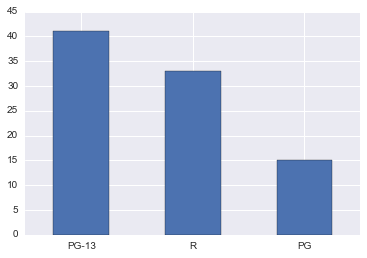

In [311]:
pd.value_counts(movies.Rating).plot(kind="bar",rot=0)

In [312]:
y = movies.Rating
X = movies.drop('Rating', axis=1)

In [313]:
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=5))
print score

0.536842105263


In [316]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=5))
print(score)

0.393429652563


In [331]:
#baseline
def baseline(x):
    l = ['PG-13' for i in range(len(x))]
    return np.array(l)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4444)

b_score = accuracy_score(y_test, baseline(X_test))
print b_score

0.444444444444


In [333]:
#coeff
lg = LogisticRegression()
fit = lg.fit(X,y)
for i in range(len(list(fit.coef_[0]))):
    beta = fit.coef_[0][i]
    print(X.columns[i],' beta:',fit.coef_[0][i])

('Budget', ' beta:', -6.6918445080276122e-09)
('DomesticTotalGross', ' beta:', -4.7772332384237788e-09)
('Runtime', ' beta:', -1.6188434386365478e-13)


Exercise 5.12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

What is the earliest year of surgery in this dataset?

What is the most recent year of surgery?

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case.

In [336]:
haberman = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names = ['age', 'year', 'nodes', 'status'])
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [337]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [338]:
print "Mean Age: ", haberman.age.mean()
print "StD of Age: ", haberman.age.std()

Mean Age:  52.4575163399
StD of Age:  10.8034523493


In [341]:
print "Mean and StD of patients who survived five or more years after surgery"
print 'Mean Age: ', haberman.loc[haberman['status']==1,'age'].mean()
print 'StD: ', haberman.loc[haberman['status']==1,'age'].std()

 Mean and StD of patients who survived five or more years after surgery
Mean Age:  52.0177777778
StD:  11.0121541799


In [343]:
print "Mean and StD of patients who survived fewer than five years after surgery"
print 'Mean Age: ', haberman.loc[haberman['status']==2,'age'].mean()
print 'StD: ', haberman.loc[haberman['status']==2,'age'].std()

Mean and StD of patients who survived fewer than five years after surgery
Mean Age:  53.6790123457
StD:  10.1671372083


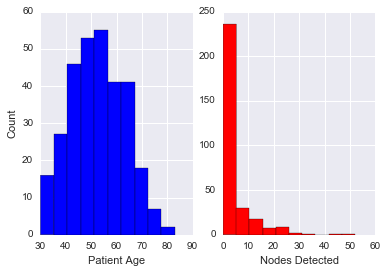

In [344]:
plt.figure(1)
plt.subplot(1, 2, 1)
plt.hist(haberman['age'], color='blue')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(haberman['nodes'], color='red')
plt.xlabel('Nodes Detected');

In [348]:
print "Earliest surgery year: 19%d" % haberman.year.min()
print "Most recent surgery year: 19%d" % haberman.year.max()

Earliest surgery year: 1958
Most recent surgery year: 1969


In [349]:
X = haberman.iloc[:, 0:3]
y = haberman.iloc[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4444)

lg = LogisticRegression()
fit = lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print acc_score

0.815217391304


In [350]:
for i in range(len(list(fit.coef_[0]))):
    beta = fit.coef_[0][i]
    print(X.columns[i],'beta:',fit.coef_[0][i])

('age', 'beta:', 0.015551502481860288)
('year', 'beta:', -0.028992790586247961)
('nodes', 'beta:', 0.071361965504665614)


Since value 2 represents surviving fewer than five years post surgery, the number of nodes and increasing age seem to possitively correlate with lower survival. More the more recent the surgery, the more likely one is to survive longer than five years.

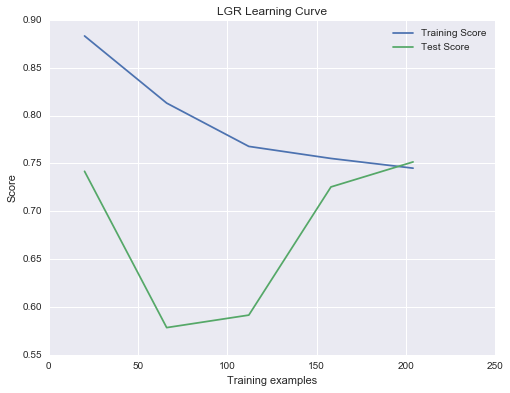

In [354]:
m, train_error, test_error = learning_curve(LogisticRegression(), X, y)

train_cv_err = np.mean(train_error, axis = 1)
test_cv_err = np.mean(test_error, axis = 1)


plt.figure(figsize = (8,6))
plt.plot(m, train_cv_err, label = 'Training Score')
plt.plot(m, test_cv_err, label = 'Test Score')
plt.legend(loc='best')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("LGR Learning Curve");